# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [2]:
from unityagents import UnityEnvironment
#from mlagents.envs import UnityEnvironment
import numpy as np
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [3]:
env = UnityEnvironment(file_name='Banana_Windows_x86_64/Banana.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [6]:
from DQN.dqn_agent import DQN_Agent
from DDQN.ddqn_agent import DDQN_Agent
from Duel_DDQN.duel_ddqn_agent import Duel_DDQN_Agent

agent1 = DQN_Agent(state_size=37, action_size=4, seed=1)
agent2 = DDQN_Agent(state_size=37, action_size=4, seed=1)
agent3 = Duel_DDQN_Agent(state_size=37, action_size=4, seed=1)

In [11]:
def train(algorithm, path , solution, agent, n_episodes, max_t, eps_start=1.0, eps_end=0.01, eps_decay=0.990):
    """Deep Q-Learning.
    Parameters:
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    """
    Other function parameters:
        algorithm (str): name of the type of DQN used 
        path (str): location where to save the trained parameters of the network
        solution (str): it will complement the name of the file that hold the trained parameters so we can have
        solution1, solution2....solutionN
    """
    print('Initializing ' + algorithm + ' train...')
    scores = []                        # list containing scores from each episode
    average_scores = []                # list containing the average scores every 100 episodes
    max_score = 0
    enviroment_solved = 0
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]  # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)                 # select an action
            
            env_info = env.step(int(action))[brain_name]   # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        
        print('\rEpisode {}\t'.format(i_episode) + algorithm +' Average Score: {:.2f}'.format(np.mean(scores_window)), end="")
        average_scores.append(np.mean(scores_window))              # save the average score
        if i_episode % 100 == 0:
            print('\rEpisode {}\t'.format(i_episode) + algorithm +' Average Score: {:.2f}'.format(np.mean(scores_window)))
        if np.mean(scores_window)>=13.0 and enviroment_solved == 0:
            print('\nEnvironment solved in {:d} episodes!\t'.format(i_episode) + algorithm +' Average Score: {:.2f}'.format(np.mean(scores_window)))
            enviroment_solved = 1
        if i_episode % 100 == 0 and np.mean(scores_window)>= max_score:   
            torch.save(agent.qnetwork_local.state_dict(), path + algorithm + '_' + solution + '_checkpoint.pth')
            max_score = np.mean(scores_window)
        if i_episode==n_episodes: 
            break
               
    # Saving the scores   
    with open(path + algorithm + '_' + solution +'_scores.txt','w') as file:
        for score, average in zip(scores, average_scores):
            file.write(('%2f\t, %2f\n') % (score, average))
    file.close()
    
    print(algorithm +' done.!')
    return scores, average_scores

In [12]:
N = 1200     # number of episodes
T = 1000    # max number of time steps
agent = agent1 
algorithm = 'DQN'
solution = 'solution2'
path = 'DQN/' # where to save the scores
dqn_scores, dqn_average_scores = train(algorithm, path, solution, agent, N, T)

Initializing DQN train...
Episode 100	DQN Average Score: 4.08
Episode 200	DQN Average Score: 10.17
Episode 300	DQN Average Score: 12.12
Episode 367	DQN Average Score: 13.00
Environment solved in 367 episodes!	DQN Average Score: 13.00
Episode 400	DQN Average Score: 13.54
Episode 500	DQN Average Score: 14.74
Episode 600	DQN Average Score: 15.30
Episode 700	DQN Average Score: 15.21
Episode 800	DQN Average Score: 16.07
Episode 900	DQN Average Score: 15.03
Episode 1000	DQN Average Score: 15.37
Episode 1100	DQN Average Score: 15.18
Episode 1200	DQN Average Score: 15.07
DQN done.!


In [14]:
N = 1200     # number of episodes
T = 1000    # max number of time steps
agent = agent2
algorithm = 'DDQN' 
path = 'DDQN/' # where to save the scores
solution = 'solution2'
ddqn_scores, ddqn_average_scores = train(algorithm, path, solution, agent, N, T)

Initializing DDQN train...
Episode 100	DDQN Average Score: 4.24
Episode 200	DDQN Average Score: 8.53
Episode 300	DDQN Average Score: 11.91
Episode 338	DDQN Average Score: 13.05
Environment solved in 338 episodes!	DDQN Average Score: 13.05
Episode 400	DDQN Average Score: 13.52
Episode 500	DDQN Average Score: 15.30
Episode 600	DDQN Average Score: 15.60
Episode 700	DDQN Average Score: 14.83
Episode 800	DDQN Average Score: 15.76
Episode 900	DDQN Average Score: 15.44
Episode 1000	DDQN Average Score: 14.78
Episode 1100	DDQN Average Score: 15.84
Episode 1200	DDQN Average Score: 16.22
DDQN done.!


In [15]:
N = 1200     # number of episodes
T = 1000    # max number of time steps
agent = agent3
algorithm = 'Dueling_DDQN'
path = 'Duel_DDQN/' # where to save the scores
solution = 'solution2'
duel_ddqn_scores, duel_ddqn_average_scores = train(algorithm, path, solution, agent, N, T)

Initializing Dueling_DDQN train...
Episode 100	Dueling_DDQN Average Score: 4.24
Episode 200	Dueling_DDQN Average Score: 10.68
Episode 277	Dueling_DDQN Average Score: 13.14
Environment solved in 277 episodes!	Dueling_DDQN Average Score: 13.14
Episode 300	Dueling_DDQN Average Score: 13.30
Episode 400	Dueling_DDQN Average Score: 14.29
Episode 500	Dueling_DDQN Average Score: 14.87
Episode 600	Dueling_DDQN Average Score: 15.88
Episode 700	Dueling_DDQN Average Score: 15.72
Episode 800	Dueling_DDQN Average Score: 16.66
Episode 900	Dueling_DDQN Average Score: 16.68
Episode 1000	Dueling_DDQN Average Score: 16.31
Episode 1100	Dueling_DDQN Average Score: 15.28
Episode 1200	Dueling_DDQN Average Score: 16.61
Dueling_DDQN done.!


In [16]:
# This functions get the scores
def get_scores(algorithm, path, solution):
    score = []
    average = []
    with open(path + algorithm + '_' + solution +'_scores.txt') as file:
        for line in file:
            score.append(float(line.split()[0]))
            average.append(float(line.split()[2]))
    file.close()
    return score, average

In [17]:
# To get all the scores from a .txt file. 'no need to train again if notebook is reloaded'

algorithm = 'DQN'
path = 'DQN/' # where to read the scores
dqn_scores, dqn_average_scores = get_scores(algorithm, path, solution)

algorithm = 'DDQN'
path = 'DDQN/' # where to read the scores
ddqn_scores, ddqn_average_scores = get_scores(algorithm, path, solution)

algorithm = 'Dueling_DDQN'
path = 'Duel_DDQN/' # where to read the scores
duel_ddqn_scores, duel_ddqn_average_scores = get_scores(algorithm, path, solution)

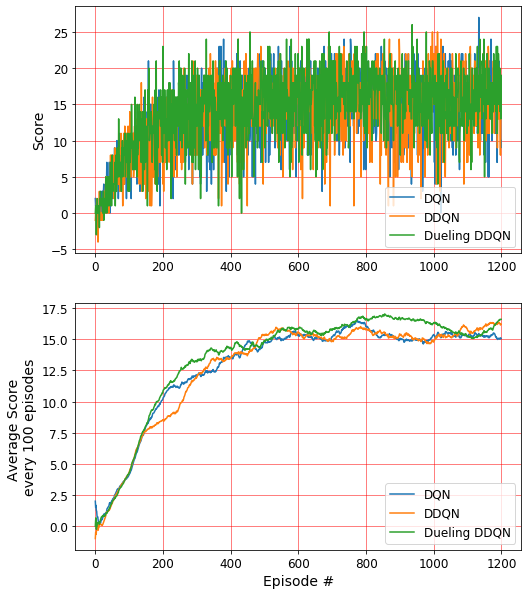

In [18]:
# plot the scores
fig = plt.figure(figsize=(8,10))
font = {'size'   : 14}
plt.rc('font', **font)
plt.rc('legend', fontsize=12)    # legend fontsize
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
ax1 = fig.add_subplot(211)
plt.plot(np.arange(len(dqn_scores)), dqn_scores)
plt.plot(np.arange(len(ddqn_scores)), ddqn_scores)
plt.plot(np.arange(len(duel_ddqn_scores)), duel_ddqn_scores)
ax1.legend(['DQN','DDQN','Dueling DDQN'],loc=4)
ax1.grid(linestyle='-', linewidth='0.5', color='red')
plt.ylabel('Score')
#plt.xlabel('Episode #')

ax2 = fig.add_subplot(212)
plt.plot(np.arange(len(dqn_scores)), dqn_average_scores)
plt.plot(np.arange(len(ddqn_scores)), ddqn_average_scores)
plt.plot(np.arange(len(duel_ddqn_scores)), duel_ddqn_average_scores)
ax2.legend(['DQN','DDQN','Dueling DDQN'],loc=4)
ax2.grid(linestyle='-', linewidth='0.5', color='red')
plt.ylabel('Average Score \nevery 100 episodes')
plt.xlabel('Episode #')

plt.show()

In [19]:
# load the weights from file
#agent1.qnetwork_local.load_state_dict(torch.load('DQN/DQN_solution2_checkpoint.pth'))
#agent2.qnetwork_local.load_state_dict(torch.load('DDQN/DDQN_solution2_checkpoint.pth'))
agent3.qnetwork_local.load_state_dict(torch.load('Duel_DDQN/Dueling_DDQN_solution2_checkpoint.pth'))

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
        
while True:
    #action = agent1.act(state)                     # select an action
    #action = agent2.act(state)                     # select an action
    action = agent3.act(state)                     # select an action
    
    env_info = env.step(int(action))[brain_name]   # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 19.0


In [20]:
env.close()